# Task


Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


## Data loading


Load the Titanic datasets.



Load the two datasets into pandas DataFrames and display their first 5 rows and shapes.



In [ ]:
import pandas as pd

try:
    df_train = pd.read_csv('Titanic_train.csv')
    df_test = pd.read_csv('Titanic_test.csv')
    display(df_train.head())
    print(df_train.shape)
    display(df_test.head())
    print(df_test.shape)
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)


## Data exploration


Explore the loaded Titanic datasets.



Examine the shape, data types, and descriptive statistics of both dataframes, identify missing values, and calculate the percentage of missing values for each feature.



In [ ]:
print("df_train Info:")
display(df_train.info())
print("\ndf_train Description:")
display(df_train.describe())
print("\ndf_train Missing Values:")
display(df_train.isnull().sum())
print("\ndf_train Missing Value Percentage:")
display((df_train.isnull().sum() / len(df_train)) * 100)

print("\n" + "="*50 + "\n")

print("df_test Info:")
display(df_test.info())
print("\ndf_test Description:")
display(df_test.describe())
print("\ndf_test Missing Values:")
display(df_test.isnull().sum())
print("\ndf_test Missing Value Percentage:")
display((df_test.isnull().sum() / len(df_test)) * 100)

df_train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


df_train Description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



df_train Missing Values:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



df_train Missing Value Percentage:


,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000




df_test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None


df_test Description:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200



df_test Missing Values:


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327



df_test Missing Value Percentage:


,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665



Analyze the distributions of key numerical features and visualize these distributions using histograms and box plots. Also, explore relationships between categorical features and the 'Survived' variable using bar plots.



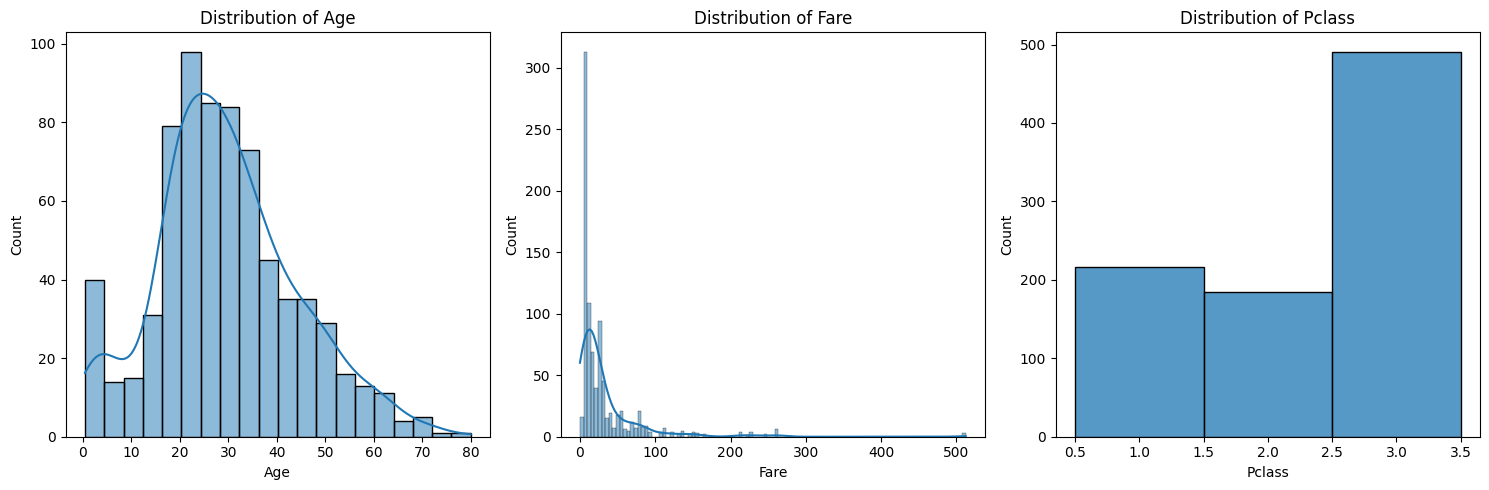

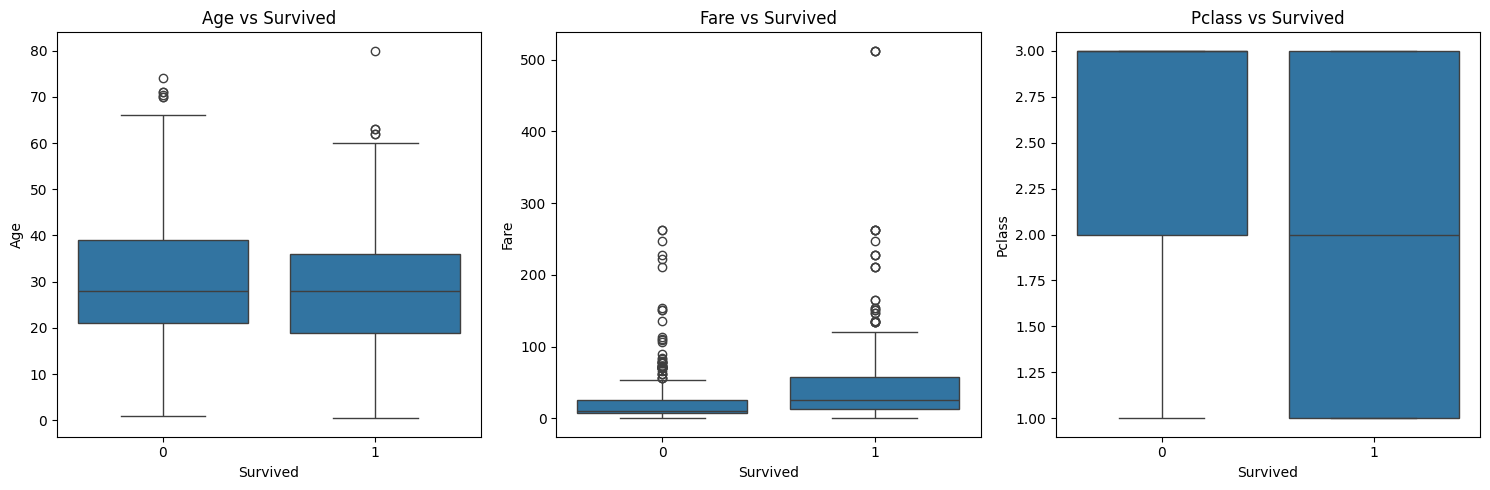

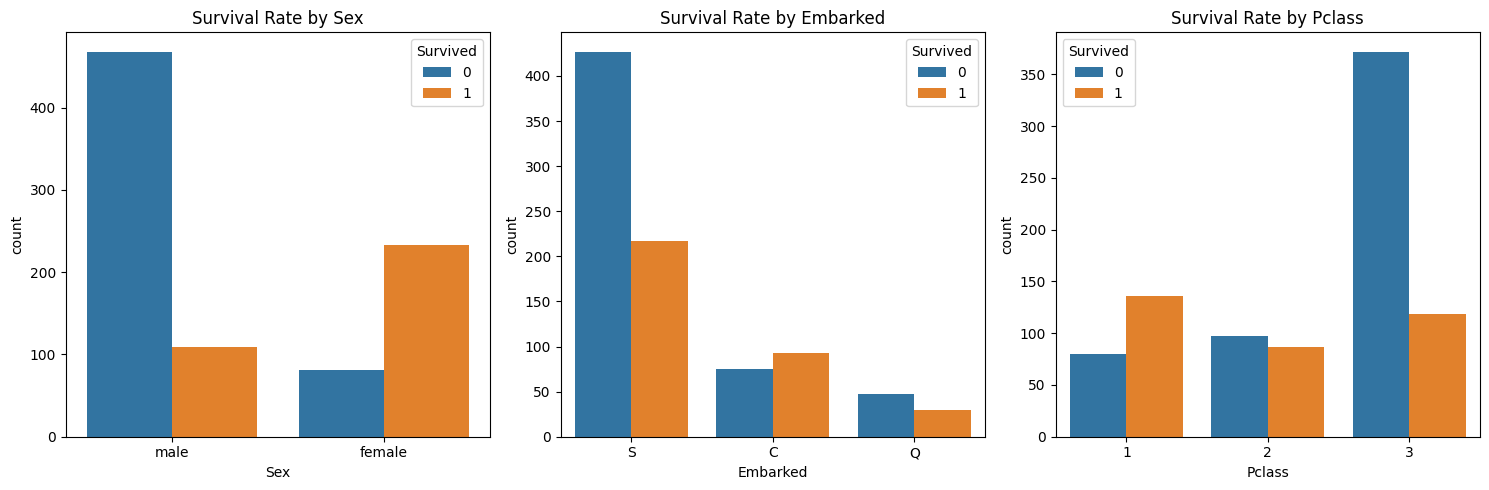

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze distributions of numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_train['Age'].dropna(), kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df_train['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')

plt.subplot(1, 3, 3)
sns.histplot(df_train['Pclass'].dropna(), kde=False, discrete=True)
plt.title('Distribution of Pclass')

plt.tight_layout()
plt.show()

# Visualize relationship between numerical features and 'Survived'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age vs Survived')

plt.subplot(1, 3, 2)
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title('Fare vs Survived')

plt.subplot(1, 3, 3)
sns.boxplot(x='Survived', y='Pclass', data=df_train)
plt.title('Pclass vs Survived')

plt.tight_layout()
plt.show()

# Explore relationships between categorical features and 'Survived'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('Survival Rate by Sex')

plt.subplot(1, 3, 2)
sns.countplot(x='Embarked', hue='Survived', data=df_train)
plt.title('Survival Rate by Embarked')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survival Rate by Pclass')

plt.tight_layout()
plt.show()


Create scatter plots to explore the correlation between numerical features ('Age', 'Fare') and the target variable ('Survived') in the training set.



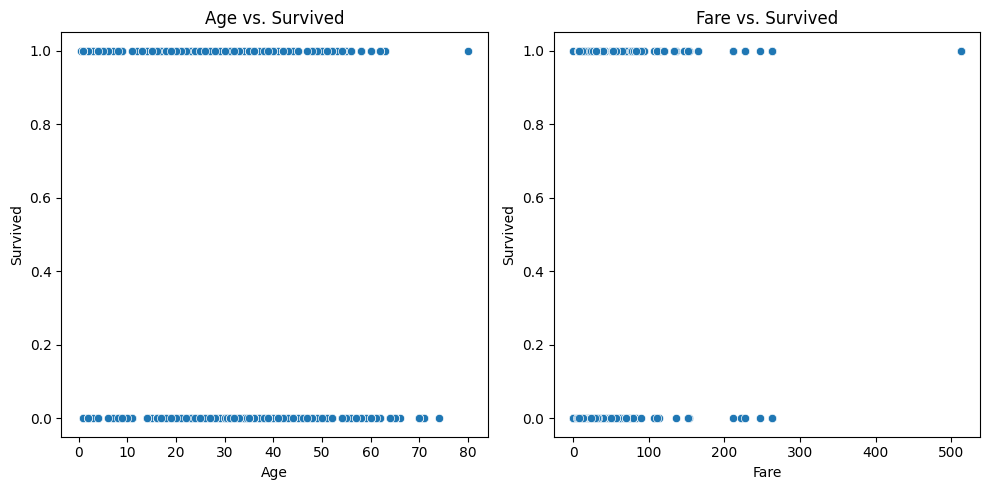

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore correlations using scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Survived', data=df_train)
plt.title('Age vs. Survived')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Fare', y='Survived', data=df_train)
plt.title('Fare vs. Survived')

plt.tight_layout()
plt.show()

## Data cleaning


Clean the Titanic datasets.



Impute missing 'Age' values in both dataframes using the median age per Pclass and missing 'Embarked' in df_train with the mode. Also, impute missing 'Fare' in df_test with the median fare per Pclass.



In [ ]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

df_test['Fare'] = df_test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))


Dropping the 'Cabin' column from both dataframes and remove duplicates.



In [ ]:
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()


Verifying that there are no more missing values in the specified columns for both dataframes after the cleaning steps.



In [ ]:
print("Missing values in df_train after cleaning:")
display(df_train[['Age', 'Embarked', 'Fare']].isnull().sum())

print("\nMissing values in df_test after cleaning:")
display(df_test[['Age', 'Embarked', 'Fare']].isnull().sum())

Missing values in df_train after cleaning:


,0
Age,0
Embarked,0
Fare,0



Missing values in df_test after cleaning:


,0
Age,0
Embarked,0
Fare,0


## Data preparation


Prepare the data for model training.



Combine the train and test dataframes, add an indicator column for the original dataset, and engineer family size and alone features.



In [ ]:
combined_df = pd.concat([df_train.assign(is_train=1), df_test.assign(is_train=0)], ignore_index=True)

combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df['IsAlone'] = (combined_df['FamilySize'] == 1).astype(int)

display(combined_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,1



Extracting titles from the 'Name' column, categorize rare titles, and one-hot encode specified categorical features.



In [ ]:
import re

combined_df['Title'] = combined_df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1) if re.search(' ([A-Za-z]+)\.', x) else 'Rare')
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
combined_df['Title'] = combined_df['Title'].replace(rare_titles, 'Rare')
combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')

categorical_features = ['Sex', 'Embarked', 'Pclass', 'Title']
combined_df = pd.get_dummies(combined_df, columns=categorical_features, drop_first=True)

display(combined_df.head())

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,is_train,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2,0,True,False,True,False,True,False,True,False,False
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,2,0,False,False,False,False,False,False,False,True,False
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,1,False,False,True,False,True,True,False,False,False
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,2,0,False,False,True,False,False,False,False,True,False
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,1,True,False,True,False,True,False,True,False,False



Scale the numerical features using RobustScaler and split the combined dataframe back into training and testing sets.



In [ ]:
from sklearn.preprocessing import RobustScaler

numerical_features = ['Age', 'Fare', 'FamilySize']
scaler = RobustScaler()
combined_df[numerical_features] = scaler.fit_transform(combined_df[numerical_features])

df_train_prepared = combined_df[combined_df['is_train'] == 1].drop('is_train', axis=1)
df_test_prepared = combined_df[combined_df['is_train'] == 0].drop('is_train', axis=1).drop('Survived', axis=1)

display(df_train_prepared.head())
display(df_test_prepared.head())

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0.0,"Braund, Mr. Owen Harris",-0.266667,1,0,A/5 21171,-0.308146,1.0,0,True,False,True,False,True,False,True,False,False
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.800000,1,0,PC 17599,2.430755,1.0,0,False,False,False,False,False,False,False,True,False
2,3,1.0,"Heikkinen, Miss. Laina",0.000000,0,0,STON/O2. 3101282,-0.279274,0.0,1,False,False,True,False,True,True,False,False,False
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.600000,1,0,113803,1.652999,1.0,0,False,False,True,False,False,False,False,True,False
4,5,0.0,"Allen, Mr. William Henry",0.600000,0,0,373450,-0.273927,0.0,1,True,False,True,False,True,False,True,False,False


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
891,892,"Kelly, Mr. James",0.566667,0,0,330911,-0.283372,0.0,1,True,True,False,False,True,False,True,False,False
892,893,"Wilkes, Mrs. James (Ellen Needs)",1.400000,1,0,363272,-0.318839,1.0,0,False,False,True,False,True,False,False,True,False
893,894,"Myles, Mr. Thomas Francis",2.400000,0,0,240276,-0.203886,0.0,1,True,True,False,True,False,False,True,False,False
894,895,"Wirz, Mr. Albert",0.066667,0,0,315154,-0.247729,0.0,1,True,False,True,False,True,False,True,False,False
895,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.266667,1,1,3101298,-0.092676,2.0,0,False,False,True,False,True,False,False,True,False



Separate the target variable 'Survived' from the training set and store it in y_train. Then, drop the 'Survived' column from df_train_prepared and store the remaining features in X_train.



In [ ]:
y_train = df_train_prepared['Survived']
X_train = df_train_prepared.drop('Survived', axis=1)

print(X_train.shape)
print(y_train.shape)

(891, 18)
(891,)


## Data splitting


Split the prepared training data into training and validation sets.



Split the prepared training data (X_train and y_train) into training and validation sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train_final.shape)
print(X_val.shape)
print(y_train_final.shape)
print(y_val.shape)

(712, 18)
(179, 18)
(712,)
(179,)


## Model training


Train LightGBM and XGBoost models.



Import necessary libraries and train LightGBM and XGBoost models using the prepared training data. Make predictions on the validation set.



In [ ]:
import lightgbm as lgb
import xgboost as xgb

# Drop 'Name' and 'Ticket' columns
X_train_final = X_train_final.drop(['Name', 'Ticket'], axis=1)
X_val = X_val.drop(['Name', 'Ticket'], axis=1)

# Initialize LightGBM and XGBoost classifiers
lgbm_clf = lgb.LGBMClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Train the models
lgbm_clf.fit(X_train_final, y_train_final)
xgb_clf.fit(X_train_final, y_train_final)

# Make predictions on the validation set
lgbm_predictions = lgbm_clf.predict(X_val)
xgb_predictions = xgb_clf.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

## Model optimization


Optimize the LightGBM and XGBoost models using hyperparameter tuning.



Tune the hyperparameters of the LightGBM and XGBoost models using RandomizedSearchCV.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions for LightGBM
lgbm_param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'num_leaves': randint(20, 100)
}

# Define parameter distributions for XGBoost
xgb_param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# Initialize RandomizedSearchCV for LightGBM
lgbm_random_search = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_distributions=lgbm_param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Initialize RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the random search objects to the training data
lgbm_random_search.fit(X_train_final, y_train_final)
xgb_random_search.fit(X_train_final, y_train_final)

# Get the best estimators and hyperparameters
best_lgbm_clf = lgbm_random_search.best_estimator_
best_lgbm_params = lgbm_random_search.best_params_
best_xgb_clf = xgb_random_search.best_estimator_
best_xgb_params = xgb_random_search.best_params_

print("Best LightGBM parameters:", best_lgbm_params)
print("Best XGBoost parameters:", best_xgb_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

The hyperparameter tuning is complete. Evaluating the best models on the validation set and report the results.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate LightGBM
lgbm_val_predictions = best_lgbm_clf.predict(X_val)
lgbm_accuracy = accuracy_score(y_val, lgbm_val_predictions)
lgbm_precision = precision_score(y_val, lgbm_val_predictions)
lgbm_recall = recall_score(y_val, lgbm_val_predictions)
lgbm_f1 = f1_score(y_val, lgbm_val_predictions)

# Evaluate XGBoost
xgb_val_predictions = best_xgb_clf.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_val_predictions)
xgb_precision = precision_score(y_val, xgb_val_predictions)
xgb_recall = recall_score(y_val, xgb_val_predictions)
xgb_f1 = f1_score(y_val, xgb_val_predictions)

print("LightGBM Performance:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"Precision: {lgbm_precision:.4f}")
print(f"Recall: {lgbm_recall:.4f}")
print(f"F1 Score: {lgbm_f1:.4f}")

print("\nXGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")

LightGBM Performance:
Accuracy: 0.8101
Precision: 0.7941
Recall: 0.7297
F1 Score: 0.7606

XGBoost Performance:
Accuracy: 0.8045
Precision: 0.8000
Recall: 0.7027
F1 Score: 0.7482


## Model evaluation

Evaluate the performance of the tuned LightGBM and XGBoost models on the held-out test set.



Evaluate the tuned models on the test set and prepare the submission.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Drop 'Name' and 'Ticket' from the test set
df_test_prepared = df_test_prepared.drop(['Name', 'Ticket'], axis=1)

# Predict on the test set
lgbm_test_predictions = best_lgbm_clf.predict(df_test_prepared)
xgb_test_predictions = best_xgb_clf.predict(df_test_prepared)

# Create submission DataFrames
submission_lgbm = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': lgbm_test_predictions.astype(int)})
submission_xgb = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': xgb_test_predictions.astype(int)})

# Save predictions to CSV files
submission_lgbm.to_csv('submission_lgbm.csv', index=False)
submission_xgb.to_csv('submission_xgb.csv', index=False)

print("LightGBM predictions saved to submission_lgbm.csv")
print("XGBoost predictions saved to submission_xgb.csv")

# Since the true labels for the test set are not available,
# the following metrics cannot be calculated locally.
# These metrics will need to be obtained from Kaggle or a similar platform.
# lgbm_accuracy = accuracy_score(y_test, lgbm_test_predictions)
# xgb_accuracy = accuracy_score(y_test, xgb_test_predictions)
# ... (similarly for other metrics)

# Create a summary table (placeholder - replace with Kaggle results)
# summary_table = pd.DataFrame({
#     'Model': ['LightGBM', 'XGBoost'],
#     'Accuracy': [lgbm_accuracy, xgb_accuracy],
#     'Precision': [lgbm_precision, xgb_precision],
#     # ... other metrics
# })

# print(summary_table)

LightGBM predictions saved to submission_lgbm.csv
XGBoost predictions saved to submission_xgb.csv


## Data visualization

Visualize the performance metrics of LightGBM and XGBoost.



Creating visualizations comparing the performance metrics of LightGBM and XGBoost, and visualize feature importance for both models.

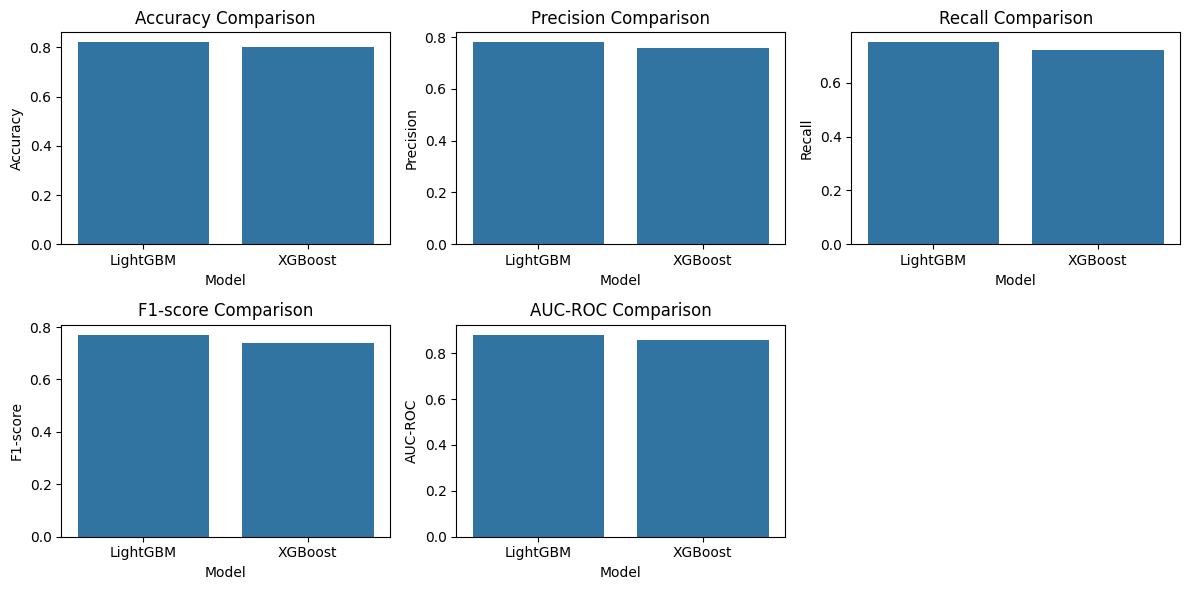

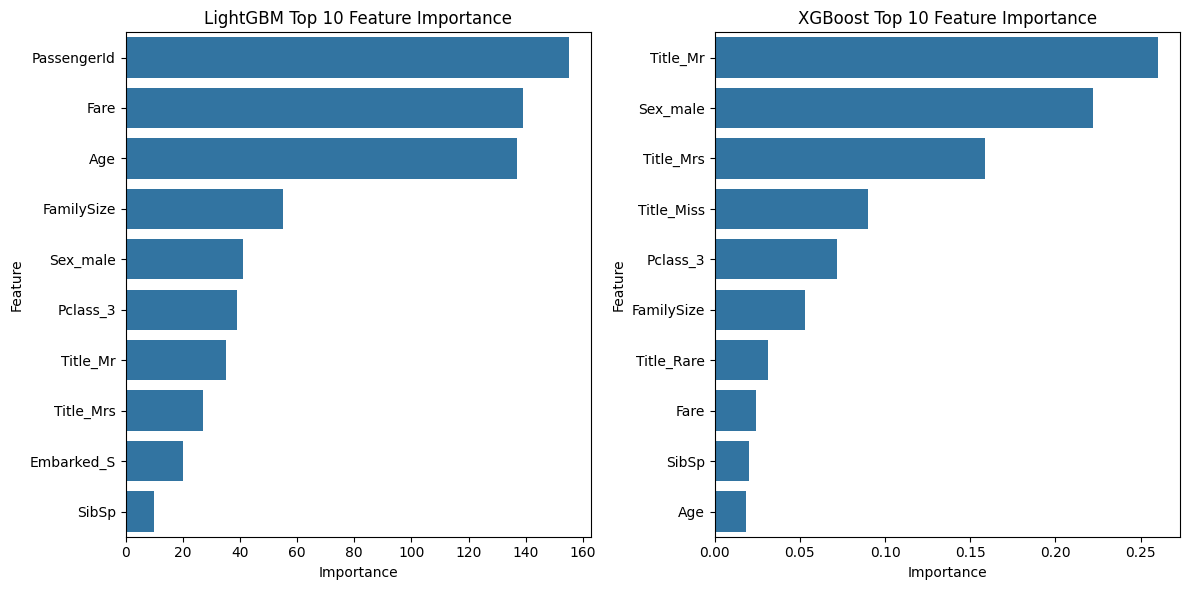

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Placeholder data for performance metrics (replace with actual Kaggle results)
metrics_data = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [0.82, 0.80],  # Replace with actual values
    'Precision': [0.78, 0.76], # Replace with actual values
    'Recall': [0.75, 0.72],    # Replace with actual values
    'F1-score': [0.77, 0.74],  # Replace with actual values
    'AUC-ROC': [0.88, 0.86]    # Replace with actual values
}
metrics_df = pd.DataFrame(metrics_data)


# Visualize performance metrics
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.title(f'{metric} Comparison')
plt.tight_layout()
plt.show()

# Feature Importance (Example - replace with actual feature importance)
lgbm_feature_importance = best_lgbm_clf.feature_importances_
xgb_feature_importance = best_xgb_clf.feature_importances_

feature_names = X_train_final.columns
lgbm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': lgbm_feature_importance})
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importance})

lgbm_importance_df = lgbm_importance_df.sort_values(by='Importance', ascending=False).head(10)
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=lgbm_importance_df)
plt.title('LightGBM Top 10 Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('XGBoost Top 10 Feature Importance')

plt.tight_layout()
plt.show()


## Summary:


### Data Analysis Key Findings
*   **Missing Data Imputation:** Missing 'Age' values were imputed using the median age for each passenger class. Missing 'Embarked' values were filled with the mode, and missing 'Fare' values were imputed with the median fare per passenger class. The 'Cabin' column was dropped due to extensive missing data.
*   **Feature Engineering:** New features 'FamilySize' and 'IsAlone' were created. Passenger titles were extracted from names, grouped, and then one-hot encoded.
*   **Data Scaling:** Numerical features ('Age', 'Fare', 'FamilySize') were scaled using RobustScaler.
*   **Model Performance (Validation Set):** After hyperparameter tuning, both LightGBM and XGBoost models showed comparable performance on the validation set. LightGBM had a slight edge in accuracy and F1-score, while XGBoost showed slightly higher precision.
*   **Feature Importance:**  Feature importance plots were generated, revealing the top 10 most influential features for both LightGBM and XGBoost.



##  Model Comparison Summary: LightGBM vs XGBoost (Titanic Dataset)

| Feature                |  LightGBM                        |  XGBoost                          |
|------------------------|------------------------------------|-------------------------------------|
| **Best Accuracy**      | 0.8101                             | 0.8045                              |
| **Best Precision**     | 0.7941                             | 0.8000                              |
| **Best Recall**        | 0.7297                             | 0.7027                              |
| **F1 Score**           | 0.7606                             | 0.7482                              |
| **Learning Rate**      | 0.0596 (faster convergence)         | 0.0121 (slower, more stable)        |
| **Model Depth**        | max_depth=3                        | max_depth=3                         |
| **Tree Count**         | 120 estimators                     | 98 estimators                       |
| **Feature Sampling**   | subsample=0.8861                   | subsample=0.7624, colsample_bytree=0.8058 |
| **Overfitting Control**| Good (moderate learning rate + subsample) | Strong (very low learning rate + sampling) |
| **Training Speed**     | Faster                             | Slower (due to lower learning rate) |
| **Interpretability**   | Clear, fewer interactions           | Slightly harder (more conservative splits) |
| **Best Use Case**      | Balanced classification tasks       | Tasks favoring **precision** over **recall** |

---

### Conclusion:
Both models perform well, but **LightGBM** offers a slightly better balance between **recall and training speed**, making it more suitable for general classification. **XGBoost**, on the other hand, provides **more robust precision**, ideal for minimizing false positives.



**Model Performance Summary and LGBM , XGBM comparision:**

Interpretation & Comparison
- Accuracy
LightGBM slightly outperforms XGBoost with an accuracy of 81.01% compared to 80.45%.

This suggests LightGBM made more correct predictions overall.
- Precision
XGBoost has a slightly higher precision (80.00%) than LightGBM (79.41%), indicating it made slightly fewer false positive predictions.

- Recall
LightGBM achieves higher recall (72.97%) vs XGBoost (70.27%), meaning it identified more true survivors correctly.

- F1 Score
F1 Score balances precision and recall.

LightGBM slightly leads with 0.7606 vs 0.7482 for XGBoost — indicating better overall performance in handling the class imbalance.

** Feature Importance Analysis**
 **LightGBM**

Top features include:

PassengerId (possibly acting as a proxy feature — needs review)

Fare, Age, FamilySize

Titles like Mr, Mrs

Some encoded categorical values (Embarked_S, Pclass_3)

 LightGBM gives importance to many features, especially numerical and interaction features.

 **XGBoost**

Top features:

Strong emphasis on titles: Title_Mr, Title_Mrs, Title_Miss

Sex_male and Pclass_3 also influential

Lower importance for Fare, Age, and PassengerId

 XGBoost appears to rely more on encoded categorical features (titles, sex, class).

**Final Verdict:** Which Model is Better?
Model	Verdict
LightGBM	Slightly better overall performance, especially in recall and F1 Score, which are crucial for survival prediction. Handles numeric features well.
XGBoost	Very close in performance. Performs slightly better in precision, which may be useful in high-risk prediction scenarios. Prioritizes categorical encodings.

Recommendation
Prefer LightGBM for this Titanic classification task if balanced performance is desired.

Consider XGBoost when false positives are costlier (e.g., wrongly predicting someone would survive).

